In [ ]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to divide train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_dataset_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_dataset_test.csv')

# rows and columns of the data
print(train.shape)

# visualise the dataset
train.head()

(14000, 7)


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
# load dataset
#train= pd.read_csv('Housing_dataset_train.csv')
#test = pd.read_csv('Housing_dataset_test.csv')

# rows and columns of the data
#print(train.shape)

# visualise the dataset
#train.head()

In [ ]:
test.shape

(6000, 6)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
#Create submission file using an empty/dummy dataframe
sub_file = pd.DataFrame(columns=['ID', 'price'])
sub_file.head()

,ID,price


In [ ]:
#Save test ID in a copy for creating submission file later
sub_file.ID = test.ID
sub_file.head()

,ID,price
0,845,NaN
1,1924,NaN
2,10718,NaN
3,12076,NaN
4,12254,NaN


In [ ]:
#checking for duplicate values before dropping the ID column
train.duplicated().any()

False

In [ ]:
#Save test ID in a copy for creating submission file later
sub_file.ID = test.ID
sub_file.head()

,ID,price
0,845,NaN
1,1924,NaN
2,10718,NaN
3,12076,NaN
4,12254,NaN


In [ ]:
#checking for duplicate values before dropping the ID column
train.duplicated().any()

False

In [ ]:
#Drop ID from train and test
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

1. What is the distribution of house types in the dataset?
2. Which state has the highest number of houses in the dataset?
3. What is the average house price in each state?
4. Is there any relationship between the number of bedrooms and the house price?
5. Which house type has the highest average number of bathrooms?
6. What is the distribution of the number of cars parking_space can fit?
7. Are there any outliers in the house price?
8. How does the house price vary with the number of bedrooms and bathrooms?
9. Is there a significant difference in house prices between different states?
10. Which state has the highest median house price?
11. What are the top 5 most expensive house types in the dataset?
12. Is there a correlation between the number of bedrooms and the number of bathrooms?
13. How does the house price vary with different house types?
14. What is the average number of bedrooms for each house type?
15. Are there any missing values in the dataset?

In [ ]:
train['parking_space'].value_counts()

4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: parking_space, dtype: int64

In [ ]:
train['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

In [ ]:
train['bathroom'].value_counts()

1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: bathroom, dtype: int64

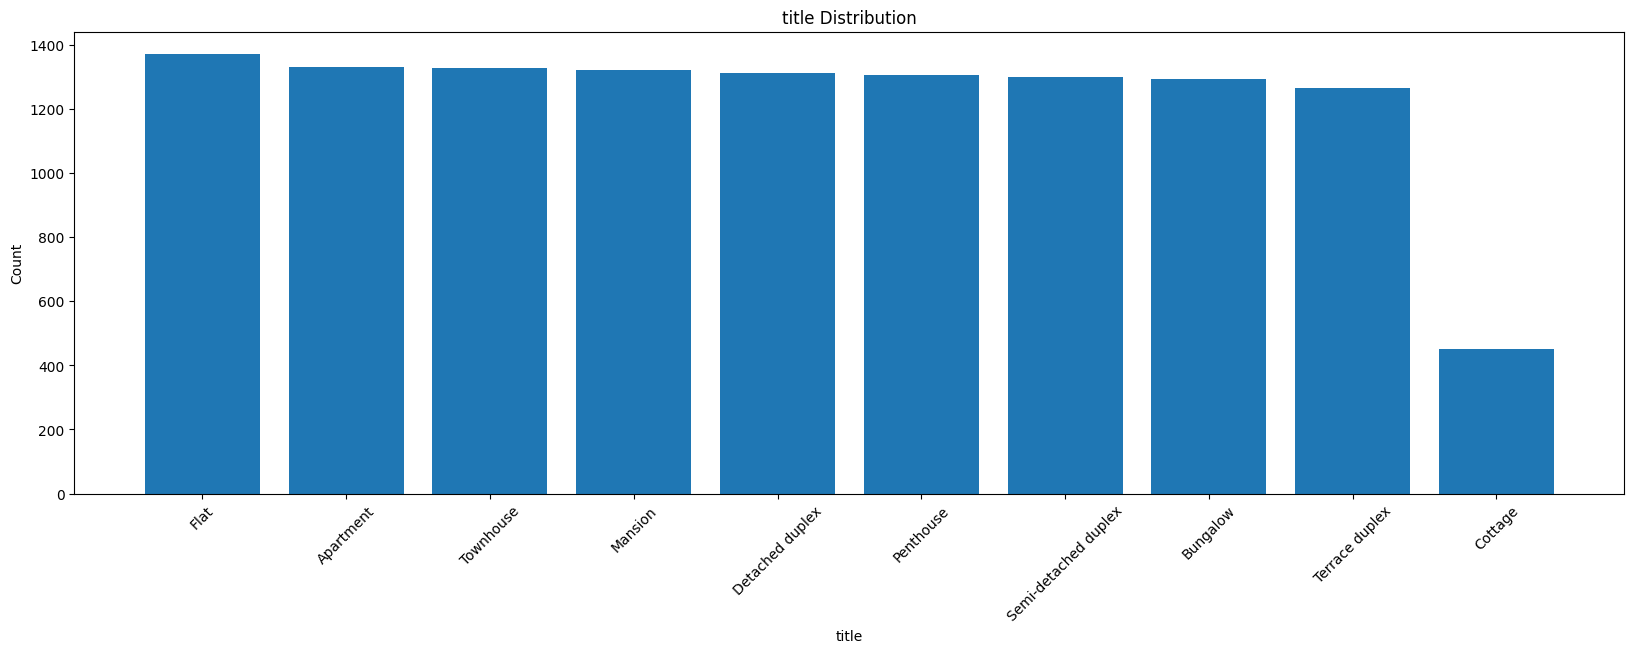

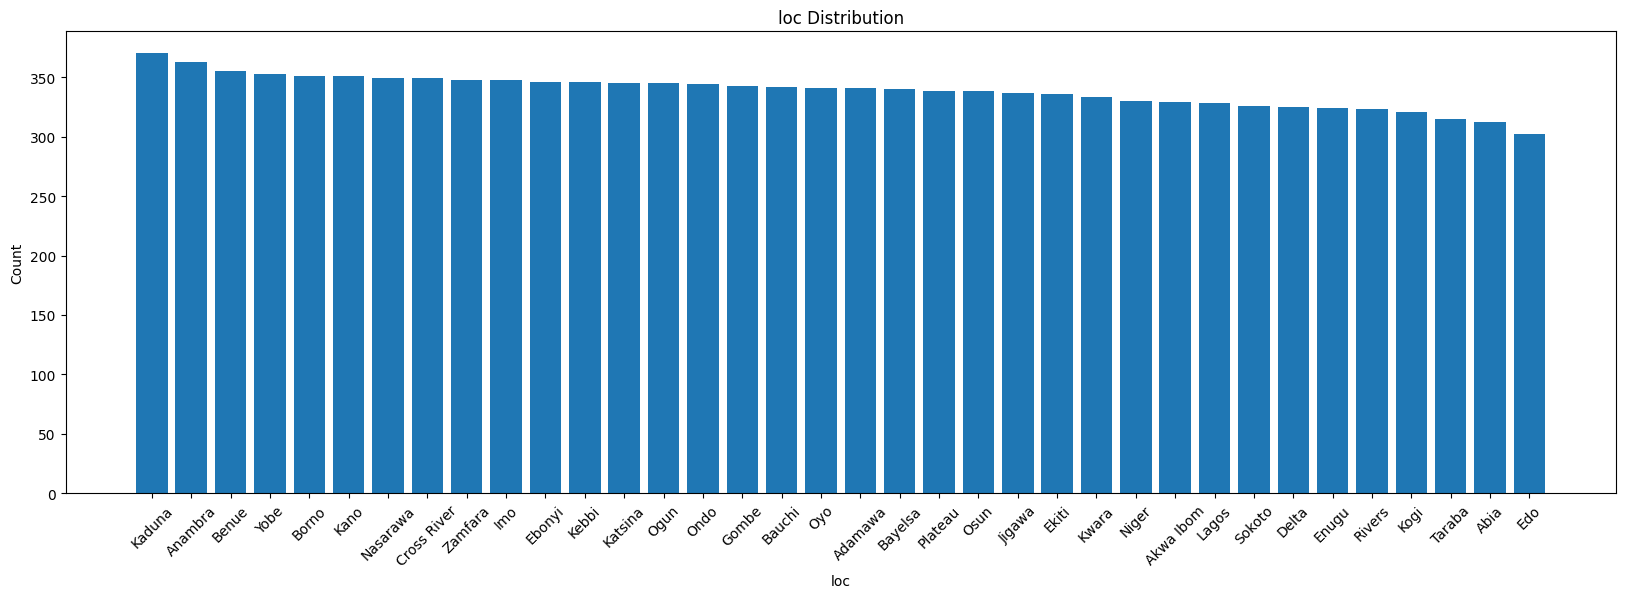

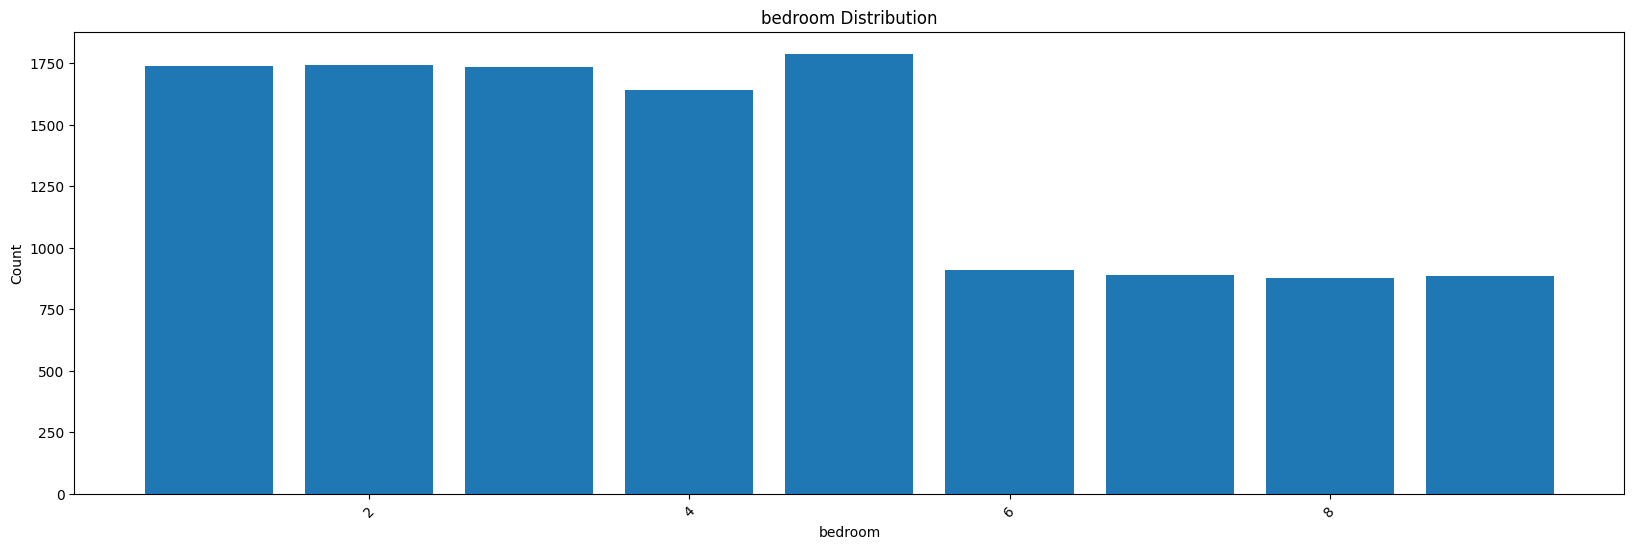

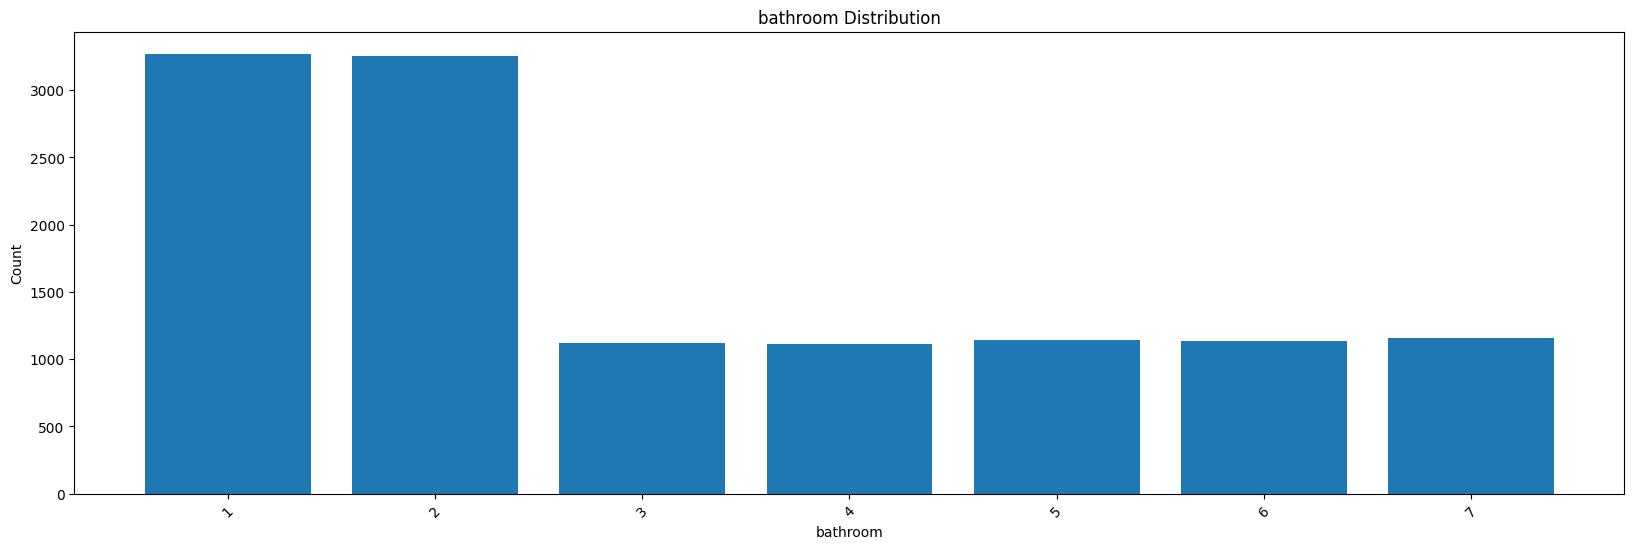

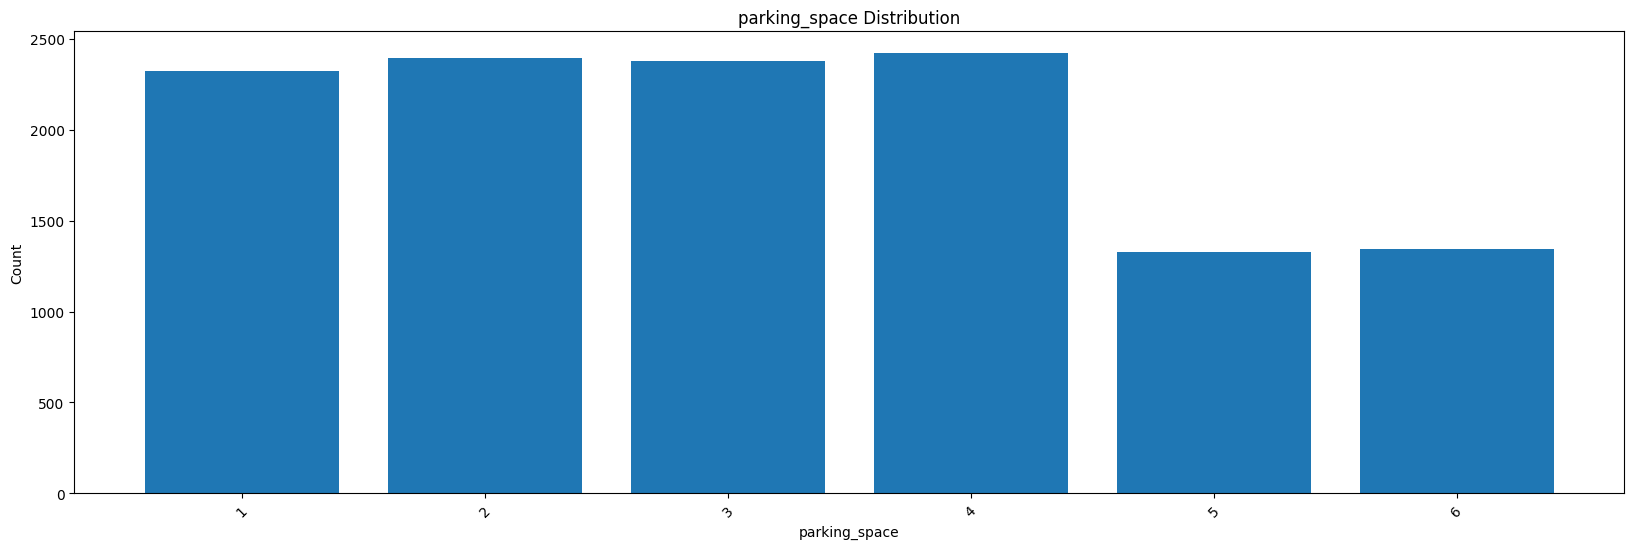

In [ ]:
def plot_bar_chart(data, column_name):
    counts = data[column_name].value_counts()
    plt.figure(figsize=(20, 6))
    plt.bar(counts.index, counts.values)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} Distribution')
    plt.xticks(rotation=45)
    plt.show()


plot_bar_chart(train, 'title')
plot_bar_chart(train, 'loc')
plot_bar_chart(train, 'bedroom')
plot_bar_chart(train, 'bathroom')
plot_bar_chart(train, 'parking_space')

<Axes: >

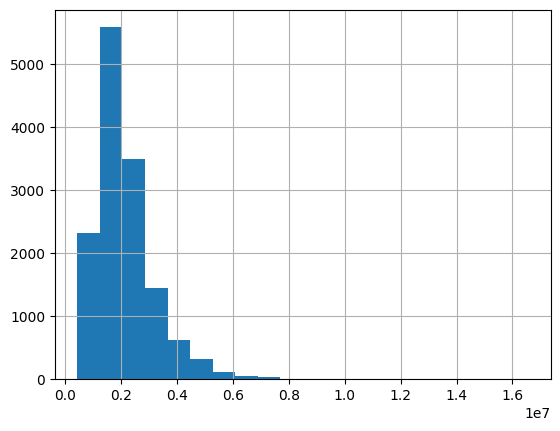

In [ ]:
train['price'].hist(bins=20)

In [ ]:
#train['price'] = np.sqrt(train['price'])
#train['price'].hist(bins=20)

<Axes: >

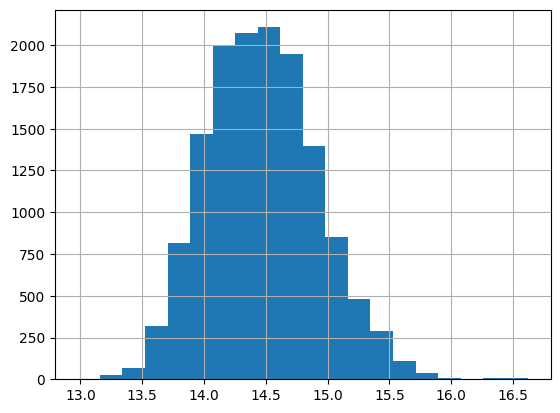

In [ ]:
train['price'] = np.log(train['price'])
train['price'].hist(bins=20)

<Axes: >

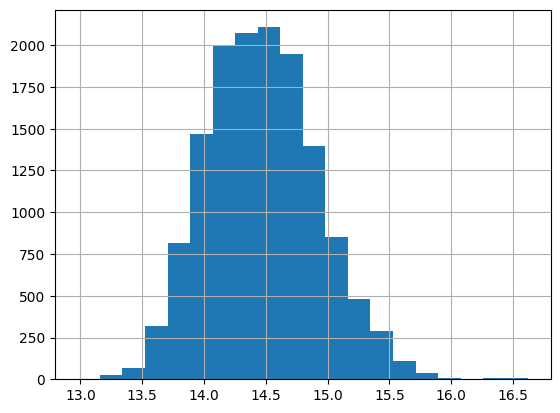

In [ ]:
train['price'].hist(bins=20)

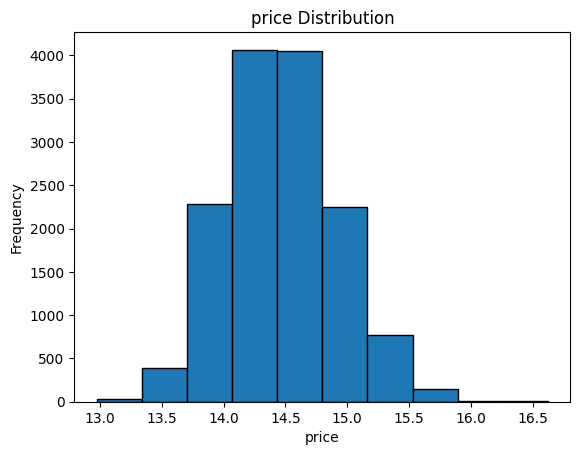

In [ ]:
def plot_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'{column_name} Distribution')
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a continuous column 'continuous_column'
plot_histogram(train, 'price')

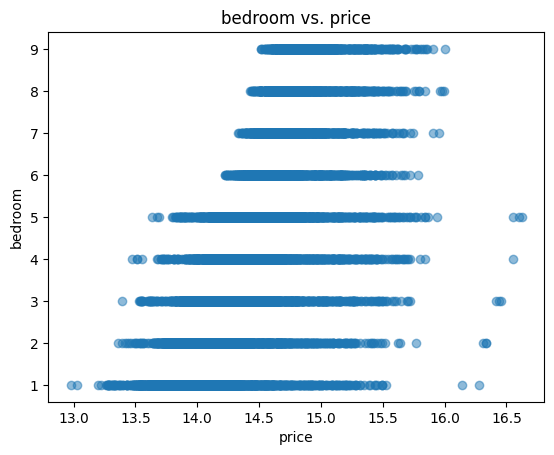

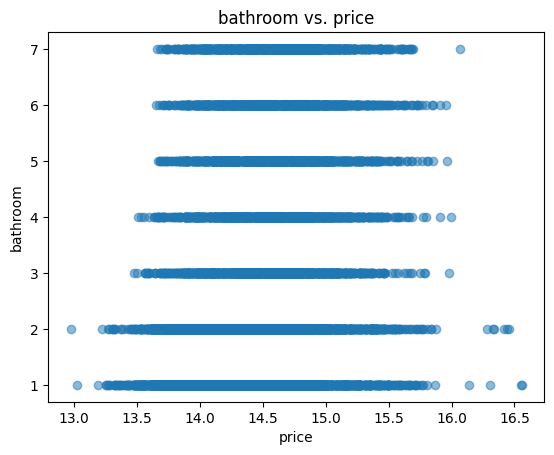

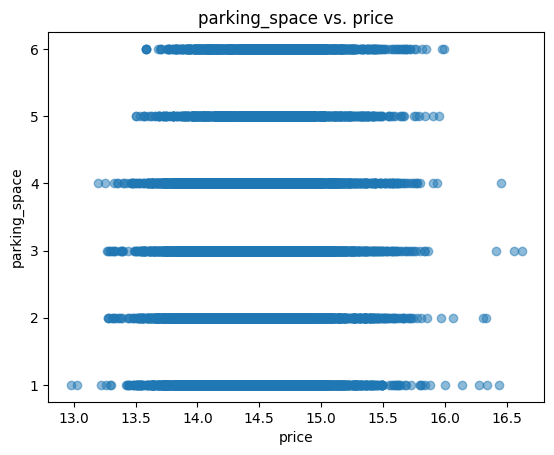

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(data, x_column, y_column):
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a continuous column 'continuous_column' and a numerical column 'numeric_column'
plot_scatter(train, 'price', 'bedroom')
plot_scatter(train, 'price', 'bathroom')
plot_scatter(train, 'price', 'parking_space')

In [ ]:
#train['price'].hist(bins=20)

In [ ]:
#train['price'] = np.log(train['price'])
#train['price'].hist(bins=20)

In [ ]:
train.head(2)

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,13.955272
1,Ondo,Apartment,NaN,2.0,4.0,14.329780


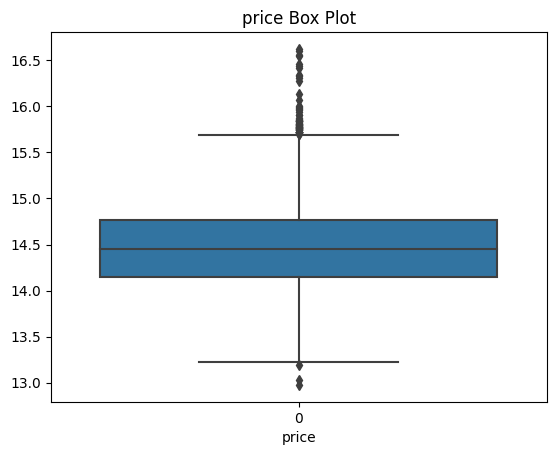

In [ ]:
#Outliers
def plot_box_plot_seaborn(data, column_name):
    sns.boxplot(data[column_name])
    plt.xlabel(column_name)
    plt.title(f'{column_name} Box Plot')
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a column 'numeric_column'
#plot_box_plot_seaborn(data_no_outliers, 'price')
plot_box_plot_seaborn(train, 'price')

In [ ]:
#train['price'] = np.log(train['price'])
#train.boxplot(column='price')

In [ ]:
#def plot_line(data, x_column, y_column, hue_column):
#    for category in data[hue_column].unique():
#        subset = data[data[hue_column] == category]
#        plt.plot(subset[x_column], subset[y_column], label=category)
#    plt.xlabel(x_column)
#    plt.ylabel(y_column)
#    plt.title(f'{y_column} vs. {x_column}')
#    plt.legend()
#    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column', a numerical column 'numeric_column', a continuous column 'continuous_column', and a hue column 'hue_column'
#plot_line(train, 'price', 'parking_space', 'title')

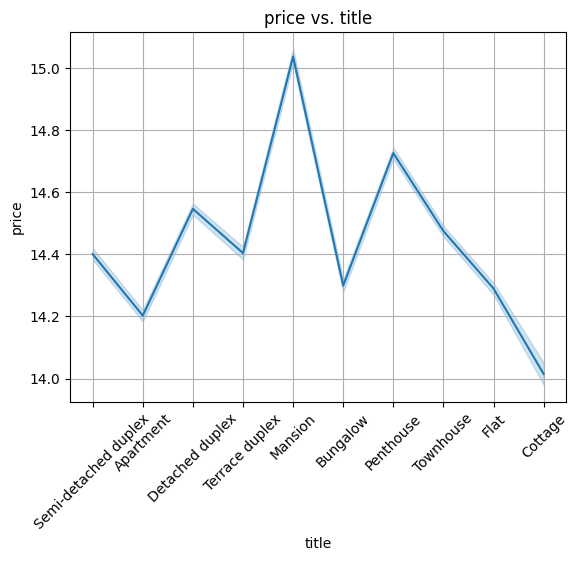

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(train, 'title', 'price')

Remove Outliers

In [ ]:
def remove_outliers_iqr(data, column_name, iqr_factor=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[(data[column_name] >= Q1 - iqr_factor * IQR) & (data[column_name] <= Q3 + iqr_factor * IQR)]
    outliers_removed = data[(data[column_name] < Q1 - iqr_factor * IQR) | (data[column_name] > Q3 + iqr_factor * IQR)]
    return data_no_outliers, outliers_removed

# Usage:
# Assuming you have a DataFrame 'df' with a column 'numeric_column'
data_no_outliers, outliers_removed = remove_outliers_iqr(train, 'price')

In [ ]:
outliers_removed

,loc,title,bedroom,bathroom,parking_space,price
229,Lagos,Mansion,8.0,5.0,2.0,15.966481
667,Kebbi,NaN,1.0,1.0,4.0,13.194912
723,Rivers,Mansion,9.0,2.0,NaN,15.773266
1110,Lagos,Mansion,9.0,NaN,1.0,16.000506
1205,Lagos,Mansion,2.0,2.0,1.0,16.338001
...,...,...,...,...,...,...
13596,Lagos,NaN,5.0,1.0,3.0,15.866845
13605,Akwa Ibom,NaN,5.0,1.0,4.0,15.704354
13695,Rivers,Mansion,5.0,2.0,3.0,15.838032
13817,Lagos,Mansion,5.0,5.0,3.0,15.765687


In [ ]:
outliers_removed.isnull().sum()

loc               9
title            10
bedroom           8
bathroom          9
parking_space     6
price             0
dtype: int64

In [ ]:
outliers_removed['title'].value_counts()

Mansion      53
Penthouse     3
Cottage       2
Name: title, dtype: int64

In [ ]:
outliers_removed['loc'].value_counts()

Lagos        27
Rivers       14
Bayelsa      11
Gombe         2
Akwa Ibom     2
Kebbi         1
Delta         1
Ogun          1
Name: loc, dtype: int64

In [ ]:
outliers_removed['bedroom'].value_counts()

5.0    14
9.0    12
8.0     8
3.0     6
1.0     5
4.0     5
2.0     4
7.0     4
6.0     2
Name: bedroom, dtype: int64

In [ ]:
outliers_removed['bathroom'].value_counts()

2.0    18
1.0    15
6.0    10
5.0     6
4.0     4
3.0     4
7.0     2
Name: bathroom, dtype: int64

In [ ]:
outliers_removed['parking_space'].value_counts()

1.0    13
3.0    12
2.0    11
4.0    11
6.0     9
5.0     6
Name: parking_space, dtype: int64

In [ ]:
outliers_removed.describe()

,bedroom,bathroom,parking_space,price
count,60.000000,59.000000,62.000000,68.000000
mean,5.550000,3.101695,3.209677,15.794516
std,2.632425,1.980029,1.699924,0.642852
min,1.000000,1.000000,1.000000,12.976105
25%,3.750000,1.500000,2.000000,15.742187
50%,5.000000,2.000000,3.000000,15.802392
75%,8.000000,5.000000,4.000000,15.959008
max,9.000000,7.000000,6.000000,16.623013


### Missing values

In [ ]:
#make a list of the variables that contain missing values
vars_with_na = [var for var in train.columns if train[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(train[var].isnull().mean(), 3),  ' % missing values')

loc 0.13  % missing values
title 0.123  % missing values
bedroom 0.128  % missing values
bathroom 0.129  % missing values
parking_space 0.129  % missing values


In [ ]:
c = train.dropna()
c.shape

(5689, 6)

In [ ]:
#title_condition_1 = (train['price'] >= 15.802392)
#train.loc[title_condition_1, 'title'] = 'Mansion'
#test.loc[title_condition_1, 'title'] = 'Mansion'

#title_condition_2 = (train['price'] <= 14.1)
#train.loc[title_condition_2, 'title'] = 'Cottage'
#test.loc[title_condition_2, 'title'] = 'Cottage'

In [ ]:
#loc_condition_high = (train['price'] >= 14.9)
#train.loc[loc_condition_high, 'loc'] = 'Lagos'
#test.loc[loc_condition_high, 'loc'] = 'Lagos'

#loc_condition_low = (train['price'] <= 14.2)
#train.loc[loc_condition_low, 'loc'] = 'Kebbi'
#test.loc[loc_condition_high, 'loc'] = 'Lagos'

In [ ]:
#bedroom_condition_1 = (train['price'] <= 14.3)
#train.loc[bedroom_condition_1, 'bedroom'] = 1
#test.loc[bedroom_condition_1, 'bedroom'] = 1

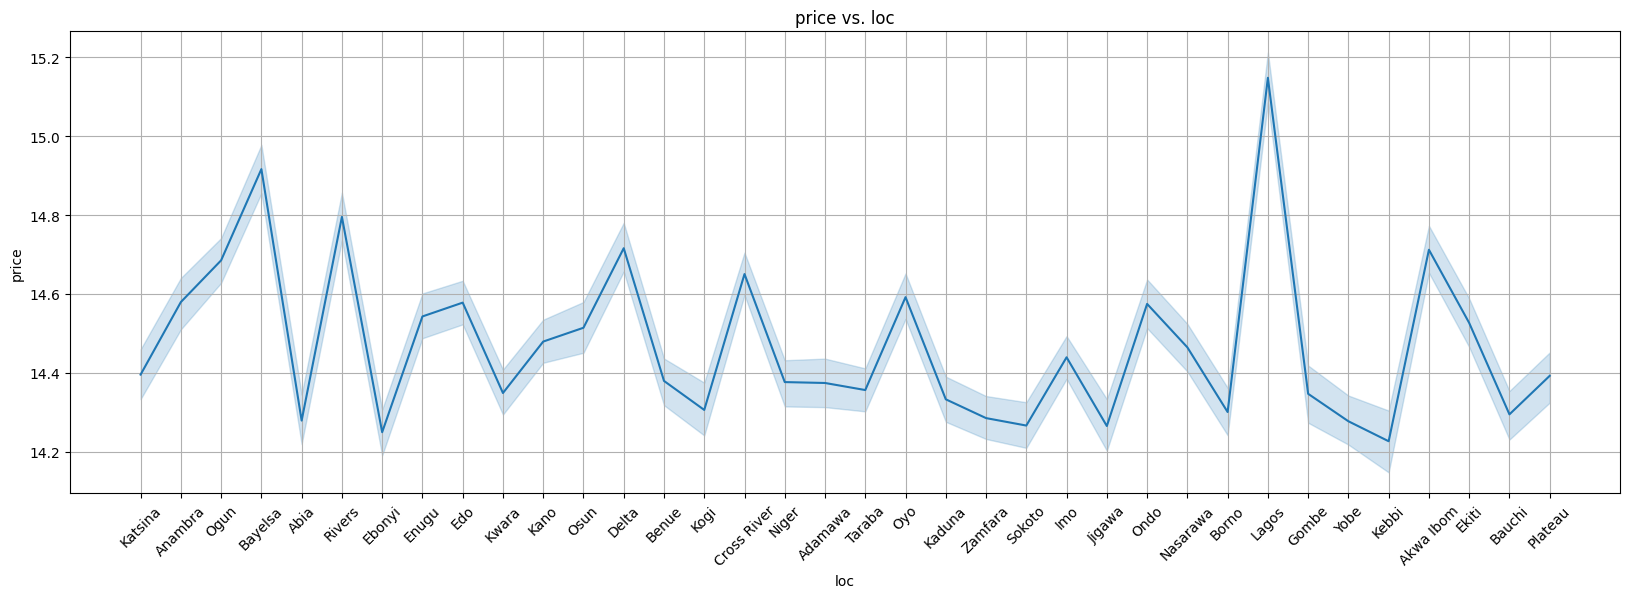

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(c, 'loc', 'price')

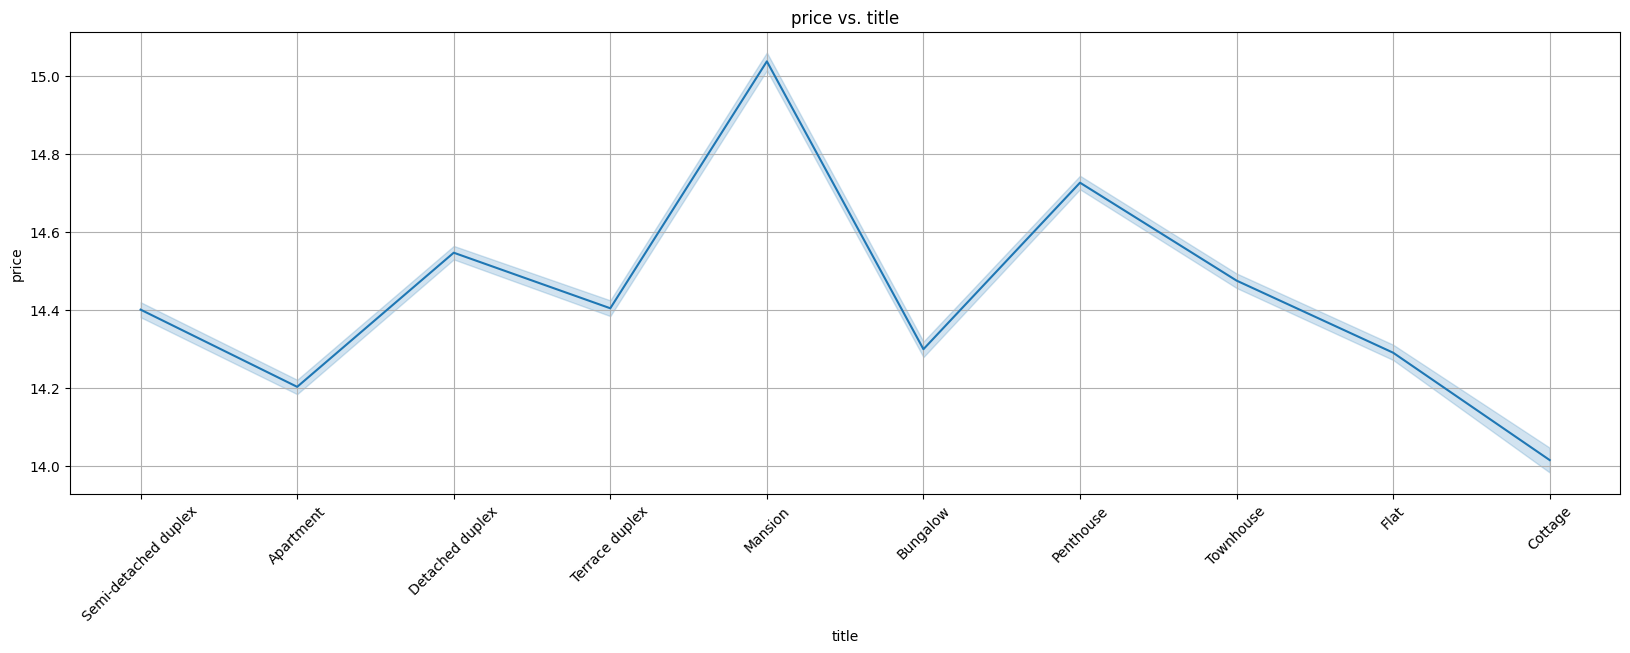

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(train, 'title', 'price')

In [ ]:
test.isnull().any()

loc              False
title            False
bedroom          False
bathroom         False
parking_space    False
dtype: bool

In [ ]:
test

,loc,title,bedroom,bathroom,parking_space
0,Kano,Penthouse,4,1,2
1,Adamawa,Apartment,2,2,4
2,Adamawa,Bungalow,2,7,2
3,Lagos,Mansion,9,5,2
4,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...
5995,Ekiti,Flat,4,5,2
5996,Adamawa,Terrace duplex,5,7,1
5997,Oyo,Townhouse,4,1,4
5998,Bauchi,Flat,3,7,5


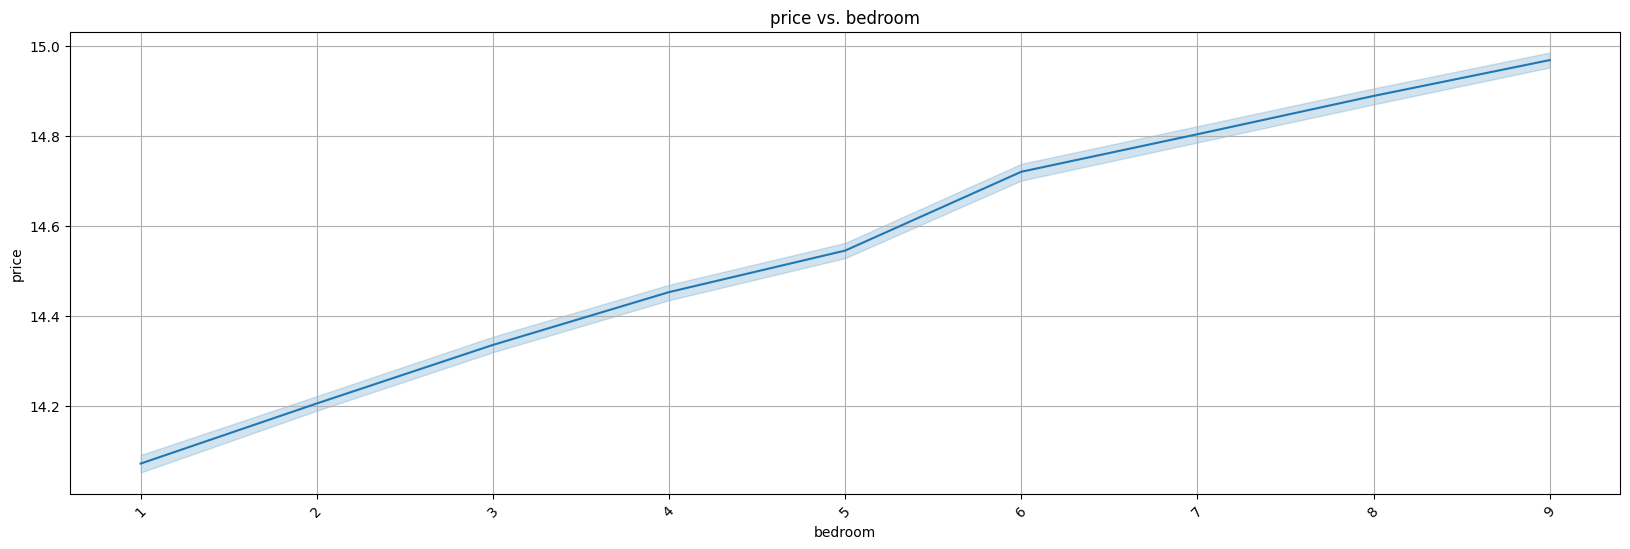

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(train, 'bedroom', 'price')

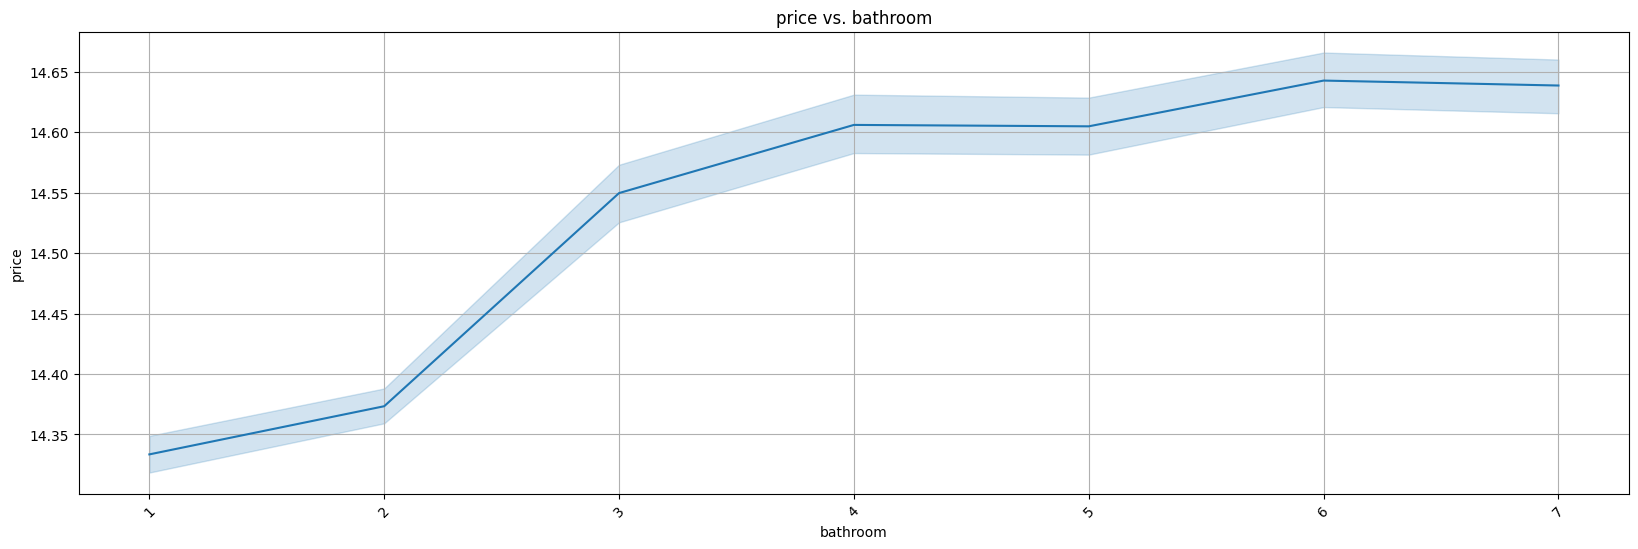

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(train, 'bathroom', 'price')

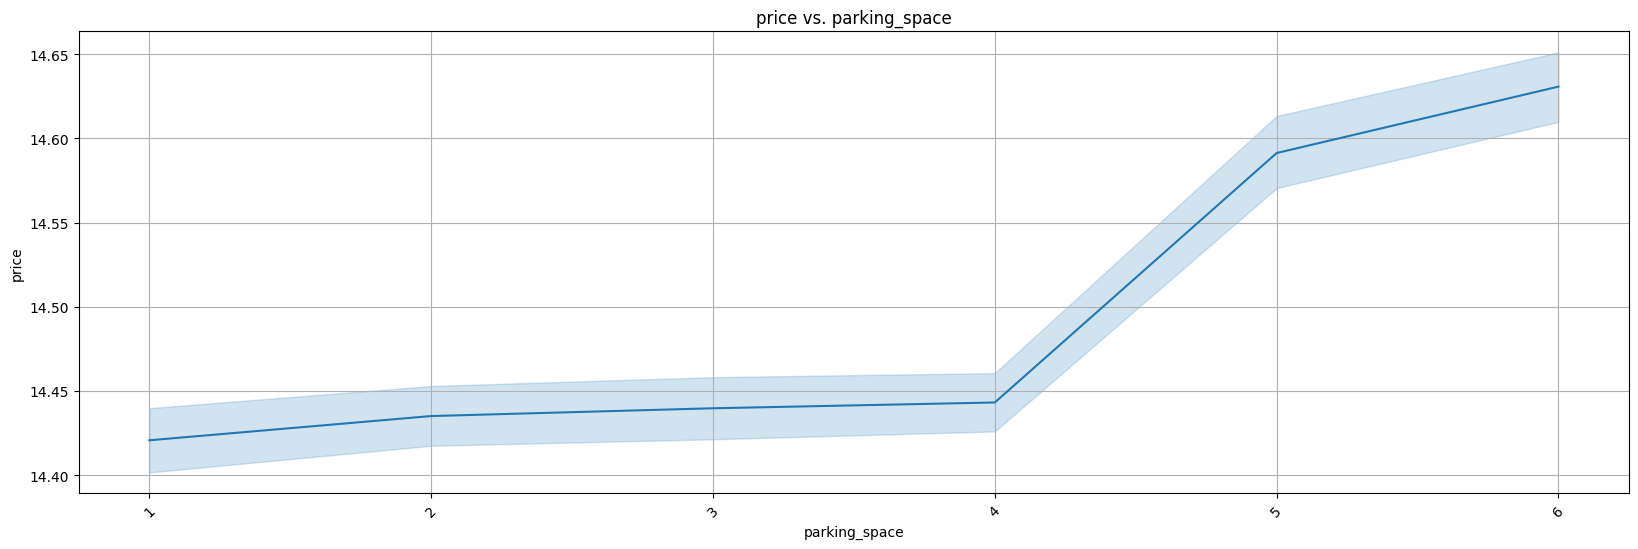

In [ ]:
def plot_line_graph_seaborn(data, x_column, y_column):
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=x_column, y=y_column, data=data)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs. {x_column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Usage:
# Assuming you have a DataFrame 'df' with a categorical column 'category_column' and a continuous column 'continuous_column'
plot_line_graph_seaborn(train, 'parking_space', 'price')

In [ ]:
train.isnull().sum()

loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [ ]:
train['bedroom'].value_counts()

5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: bedroom, dtype: int64

In [ ]:
c

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,13.955272
3,Anambra,Detached duplex,5.0,2.0,4.0,14.695265
7,Katsina,Penthouse,3.0,3.0,5.0,14.529983
10,Ogun,Bungalow,1.0,2.0,6.0,14.100850
11,Bayelsa,Apartment,3.0,4.0,2.0,14.453025
...,...,...,...,...,...,...
13989,Kebbi,Terrace duplex,4.0,7.0,2.0,14.273607
13990,Kebbi,Penthouse,8.0,7.0,3.0,14.942516
13992,Ogun,Cottage,1.0,2.0,2.0,14.226528
13994,Taraba,Detached duplex,8.0,1.0,6.0,14.858328


In [ ]:
#train[train.duplicated()]

In [ ]:
train.describe()

,bedroom,bathroom,parking_space,price
count,12201.000000,12195.000000,12189.000000,14000.000000
mean,4.308171,3.134235,3.169825,14.471872
std,2.441165,2.035950,1.599415,0.445117
min,1.000000,1.000000,1.000000,12.976105
25%,2.000000,1.000000,2.000000,14.147680
50%,4.000000,2.000000,3.000000,14.454847
75%,6.000000,5.000000,4.000000,14.765893
max,9.000000,7.000000,6.000000,16.623013


In [ ]:
#qty_of_nuls = 3
#a = train.iloc[train[(train.isnull().sum(axis=1) >= qty_of_nuls)].index]

In [ ]:
# Assuming you have a DataFrame 'df' and want to find the mode of a column 'column_name'
#mode_value = train['bathroom'].mode().values[0]

# 'mode_value' will now store the mode of the 'column_name'

In [ ]:
#mode_value

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [ ]:
# list of numerical variables
num_vars = [var for var in train.columns if train[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
train[num_vars].head(3).T

Number of numerical variables:  4


,0,1,2
bedroom,2.000000,NaN,7.000000
bathroom,2.000000,2.00000,5.000000
parking_space,1.000000,4.00000,NaN
price,13.955272,14.32978,15.028879


In [ ]:
#adding bathroom to bedroom ratio
train['bath_bed_ratio'] = train['bathroom'] / train['bedroom']
c['bath_bed_ratio'] = c['bathroom'] / c['bedroom']
test['bath_bed_ratio'] = test['bathroom'] / test['bedroom']

In [ ]:
train.head(2)

,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,13.955272,1.0
1,Ondo,Apartment,NaN,2.0,4.0,14.329780,NaN


### Categorical variables

In [ ]:
# let's capture the categorical variables first
cat_vars = [var for var in train.columns if train[var].dtype == 'O']
cat_vars

['loc', 'title']

In [ ]:
train['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

In [ ]:
test.head()

,loc,title,bedroom,bathroom,parking_space,bath_bed_ratio
0,Kano,Penthouse,4,1,2,0.250000
1,Adamawa,Apartment,2,2,4,1.000000
2,Adamawa,Bungalow,2,7,2,3.500000
3,Lagos,Mansion,9,5,2,0.555556
4,Gombe,Semi-detached duplex,5,6,1,1.200000


In [ ]:
train

,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,13.955272,1.000000
1,Ondo,Apartment,NaN,2.0,4.0,14.329780,NaN
2,Ekiti,NaN,7.0,5.0,NaN,15.028879,0.714286
3,Anambra,Detached duplex,5.0,2.0,4.0,14.695265,0.400000
4,Kogi,Terrace duplex,NaN,5.0,6.0,14.771292,NaN
...,...,...,...,...,...,...,...
13995,Edo,Bungalow,NaN,7.0,NaN,14.677526,NaN
13996,Kaduna,Apartment,NaN,7.0,5.0,14.616847,NaN
13997,Plateau,Bungalow,8.0,6.0,5.0,14.693814,0.750000
13998,Delta,Flat,NaN,6.0,1.0,15.024148,NaN


In [ ]:
train['title'].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

In [ ]:
# Define the ranking based on size (arranged from smallest to biggest)
house_type_ranking = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
train['title'] = train['title'].map(house_type_ranking)
test['title'] = test['title'].map(house_type_ranking)
c['title'] = c['title'].map(house_type_ranking)


# Print the updated dataframe
train.head(2)


,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio
0,Katsina,6.0,2.0,2.0,1.0,13.955272,1.0
1,Ondo,9.0,NaN,2.0,4.0,14.329780,NaN


In [ ]:
North_Central = ['Benue', 'Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Plateau', 'FCT']
North_East = ['Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe']
North_West = ['Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Sokoto', 'Zamfara']
South_East = ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']
South_South = ['Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers']
South_West = ['Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']

In [ ]:
# Create an empty list to store the assigned names
Geopolitical_zone_train = []

# Loop through the values in the 'Column1'
for value in train['loc']:
    # Check if the value is in the 'name_list'
    if value in North_Central:
        # Assign a name based on the condition
        Geopolitical_zone_train.append('NC')
    elif value in North_East:
        Geopolitical_zone_train.append('NE')
    elif value in North_West:
        Geopolitical_zone_train.append('NW')
    elif value in South_East:
        Geopolitical_zone_train.append('SE')
    elif value in South_South:
        Geopolitical_zone_train.append('SS')
    elif value in South_West:
        Geopolitical_zone_train.append('SW')
    else:
        Geopolitical_zone_train.append(np.nan)

In [ ]:
# Create an empty list to store the assigned names
Geopolitical_zone_test = []

# Loop through the values in the 'Column1'
for value in test['loc']:
    # Check if the value is in the 'name_list'
    if value in North_Central:
        # Assign a name based on the condition
        Geopolitical_zone_test.append('NC')
    elif value in North_East:
        Geopolitical_zone_test.append('NE')
    elif value in North_West:
        Geopolitical_zone_test.append('NW')
    elif value in South_East:
        Geopolitical_zone_test.append('SE')
    elif value in South_South:
        Geopolitical_zone_test.append('SS')
    else:
        Geopolitical_zone_test.append(np.nan)

In [ ]:
train['Geo_zone'] = Geopolitical_zone_train
test['Geo_zone'] = Geopolitical_zone_test
#c['Geo_zone'] = Geopolitical_zone_c

In [ ]:
#house_type_ranking = {
#    'Cottage': 1,
#    'Bungalow' : 2,
#    'Flat' : 3,
#    'Townhouse' : 4,
#    'Semi-detached duplex' : 5,
#    'Terrace duplex' : 6,
#    'Detached duplex' : 7,
#    'Apartment' : 8,
#    'Penthouse' : 9,
#    'Mansion' : 10,
#}
#train['title'] = train['title'].map(house_type_ranking)
#test['title'] = test['title'].map(house_type_ranking)
#c['title'] = c['title'].map(house_type_ranking)

In [ ]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies_train = train['loc'].value_counts(normalize=True)
category_frequencies_test = test['loc'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping_train = category_frequencies_train.to_dict()
loc_frequency_mapping_test = category_frequencies_test.to_dict()

# Map the 'loc' column to its corresponding frequency values
train['loc'] = train['loc'].map(loc_frequency_mapping_train)
test['loc'] = test['loc'].map(loc_frequency_mapping_test)

# Print the updated dataframe
train.head(2)


,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio,Geo_zone
0,0.028309,6.0,2.0,2.0,1.0,13.955272,1.0,NW
1,0.028227,9.0,NaN,2.0,4.0,14.329780,NaN,SW


In [ ]:
test.head(2)

,loc,title,bedroom,bathroom,parking_space,bath_bed_ratio,Geo_zone
0,0.028333,8,4,1,2,0.25,NW
1,0.029167,9,2,2,4,1.00,NE


In [ ]:
# Calculate the frequency of each category in the 'loc' column
category_frequencies_train = train['Geo_zone'].value_counts(normalize=True)
category_frequencies_test = test['Geo_zone'].value_counts(normalize=True)

# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping_train = category_frequencies_train.to_dict()
loc_frequency_mapping_test = category_frequencies_test.to_dict()

# Map the 'loc' column to its corresponding frequency values
train['Geo_zone'] = train['Geo_zone'].map(loc_frequency_mapping_train)
test['Geo_zone'] = test['Geo_zone'].map(loc_frequency_mapping_test)

# Print the updated dataframe
train.head(2)


,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio,Geo_zone
0,0.028309,6.0,2.0,2.0,1.0,13.955272,1.0,0.198818
1,0.028227,9.0,NaN,2.0,4.0,14.329780,NaN,0.166735


In [ ]:
#

In [ ]:
test.head()

,loc,title,bedroom,bathroom,parking_space,bath_bed_ratio,Geo_zone
0,0.028333,8,4,1,2,0.250000,0.235009
1,0.029167,9,2,2,4,1.000000,0.206340
2,0.029167,2,2,7,2,3.500000,0.206340
3,0.029000,10,9,5,2,0.555556,NaN
4,0.026333,6,5,6,1,1.200000,0.206340


In [ ]:
#train = pd.get_dummies(train, columns=['loc'])
#test = pd.get_dummies(test, columns=['loc'])
#c = pd.get_dummies(c, columns=['loc'])

In [ ]:
#geo_ranking = {
#    'NW': 1,
#    'NC' : 2,
#    'NE' : 3,
#    'SE' : 4,
#    'SW' : 5,
#    'SS' : 6,
#}
#train['Geo_zone'] = train['Geo_zone'].map(geo_ranking)
#test['Geo_zone'] = test['Geo_zone'].map(geo_ranking)
#c['Geo_zone'] = c['Geo_zone'].map(geo_ranking)

In [ ]:
train.describe()

,loc,title,bedroom,bathroom,parking_space,price,bath_bed_ratio,Geo_zone
count,12187.000000,12278.000000,12201.000000,12195.000000,12189.000000,14000.000000,10469.000000,12187.000000
mean,0.027825,5.838573,4.308171,3.134235,3.169825,14.471872,1.062597,0.168499
std,0.001139,2.702484,2.441165,2.035950,1.599415,0.445117,1.182029,0.017713
min,0.024781,1.000000,1.000000,1.000000,1.000000,12.976105,0.111111,0.138919
25%,0.026996,3.250000,2.000000,1.000000,2.000000,14.147680,0.400000,0.161484
50%,0.027981,6.000000,4.000000,2.000000,3.000000,14.454847,0.666667,0.166735
75%,0.028555,8.000000,6.000000,5.000000,4.000000,14.765893,1.166667,0.167802
max,0.030360,10.000000,9.000000,7.000000,6.000000,16.623013,7.000000,0.198818


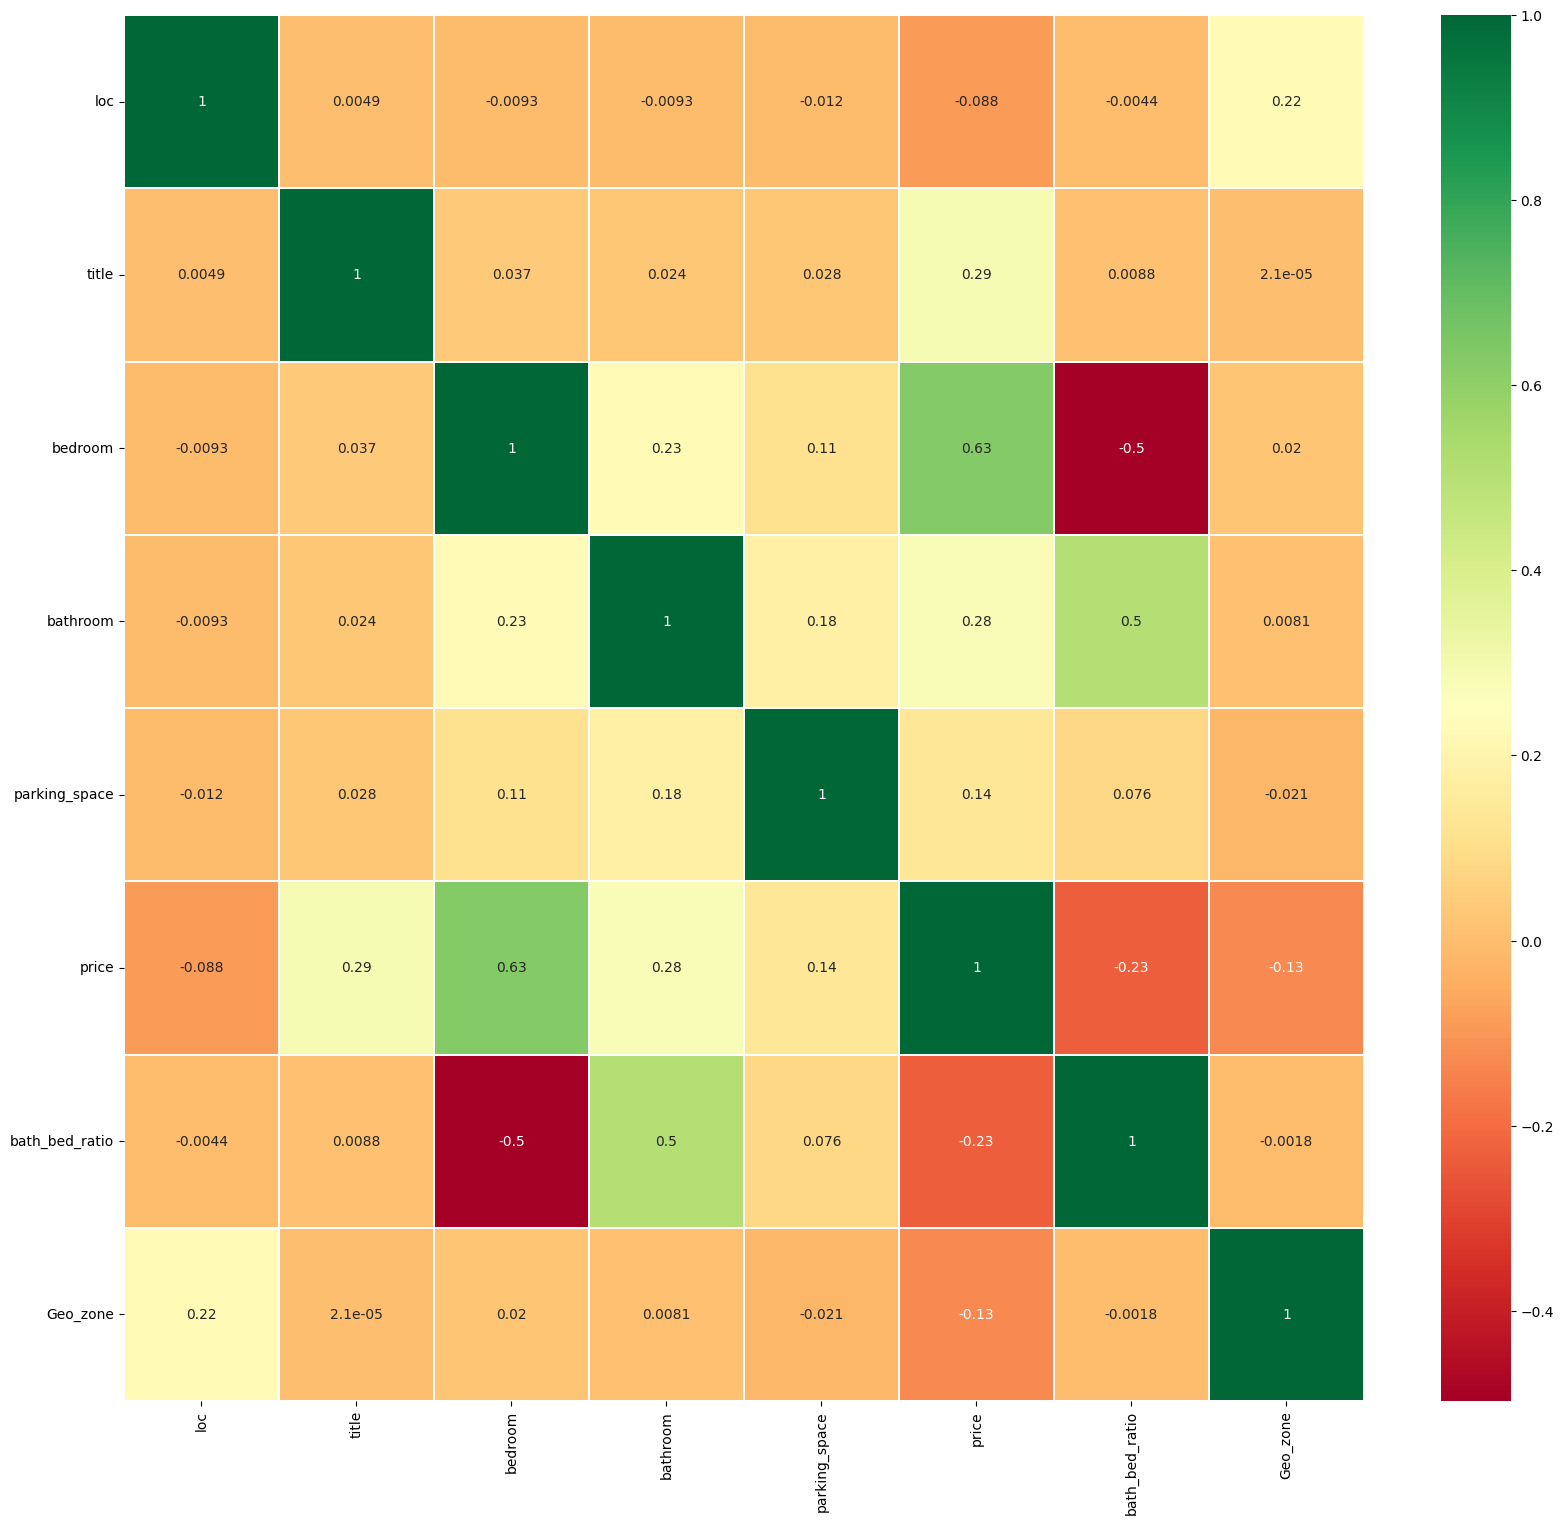

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()

In [ ]:
X = train.drop('price', axis =1)
y = train['price']

## Modelling

In [ ]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42) # we are setting the seed here
X_train.shape, X_test.shape

((10500, 7), (3500, 7))

In [ ]:
%%capture
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [ ]:
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,  ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import auc, roc_auc_score, accuracy_score
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split #For splitting

#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error

In [ ]:
models = []
#models.append(('log_model', LogisticRegression()))
#models.append(('bc', BaggingRegressor()))
#models.append(('dT', DecisionTreeClassifier()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('RFC', RandomForestRegressor()))
#models.append(('GBC', GradientBoostingRegressor()))
#models.append(('Adb', AdaBoostRegressor()))
#models.append(('Extra_Tree', ExtraTreesRegressor()))
models.append(('Xgb', XGBRegressor()))
models.append(('lightgbm', LGBMRegressor()))
models.append(('cat', CatBoostRegressor()))
#models.append(('Kneighbors', KNeighborsRegressor()))

In [ ]:
results =[]
names =[]
for name, model in models:
    model.fit(X_train, y_train)
    score = np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
    results.append(score)
    names.append(name)
    msg ="%s: %f " % (name, score)
    print(msg)

Xgb: 152.914318 
lightgbm: 150.080225 
Learning rate set to 0.0611
0:	learn: 320.1935627	total: 3.25ms	remaining: 3.24s
1:	learn: 310.8263213	total: 6.02ms	remaining: 3s
2:	learn: 301.6761857	total: 8.46ms	remaining: 2.81s
3:	learn: 293.5078171	total: 11.2ms	remaining: 2.78s
4:	learn: 285.7457437	total: 13.7ms	remaining: 2.73s
5:	learn: 278.7614808	total: 19ms	remaining: 3.15s
6:	learn: 272.2015219	total: 22.7ms	remaining: 3.21s
7:	learn: 266.0991746	total: 25.2ms	remaining: 3.13s
8:	learn: 260.7675643	total: 27.6ms	remaining: 3.04s
9:	learn: 255.8925665	total: 30ms	remaining: 2.97s
10:	learn: 250.8587436	total: 32.3ms	remaining: 2.9s
11:	learn: 246.0880856	total: 34.9ms	remaining: 2.87s
12:	learn: 241.3698975	total: 37.3ms	remaining: 2.83s
13:	learn: 237.1903524	total: 39.8ms	remaining: 2.81s
14:	learn: 233.4805354	total: 42.4ms	remaining: 2.78s
15:	learn: 230.3605768	total: 44.9ms	remaining: 2.76s
16:	learn: 227.4163755	total: 47.8ms	remaining: 2.76s
17:	learn: 224.3017171	total: 50.

model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.05,
                          depth=6,
                          l2_leaf_reg=3,
                          loss_function='RMSE',
                          random_seed=42)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold,RepeatedStratifiedKFold

In [ ]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 7,
 'subsample': 0.85}


fold = KFold(n_splits=7, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose = False)#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    p2 = model.predict(test[X.columns])
    fold_pred.append(np.expm1(p2))


print(np.mean(oof_pred))

err:  0.18990662708124592
err:  0.1949775563362101
err:  0.18983623816231887
err:  0.3953286376125645
err:  0.19104763933445637
err:  0.19771328703507332
err:  0.18365905706108332
0.2203527203747075


In [ ]:
sub_file['price'] =  np.exp(np.mean(fold_pred, axis = 0))

In [ ]:
sub_file.head()

,ID,price
0,845,2.024151e+06
1,1924,1.136388e+06
2,10718,1.314282e+06
3,12076,4.604420e+06
4,12254,1.805968e+06


In [ ]:
#Save to Csv for submission
sub_file.to_csv('/content/drive/MyDrive/Colab Notebooks/lgb_pred_new_5.csv', index=False)

Text(0.5, 1.0, 'CatboostClassifier features importance :')

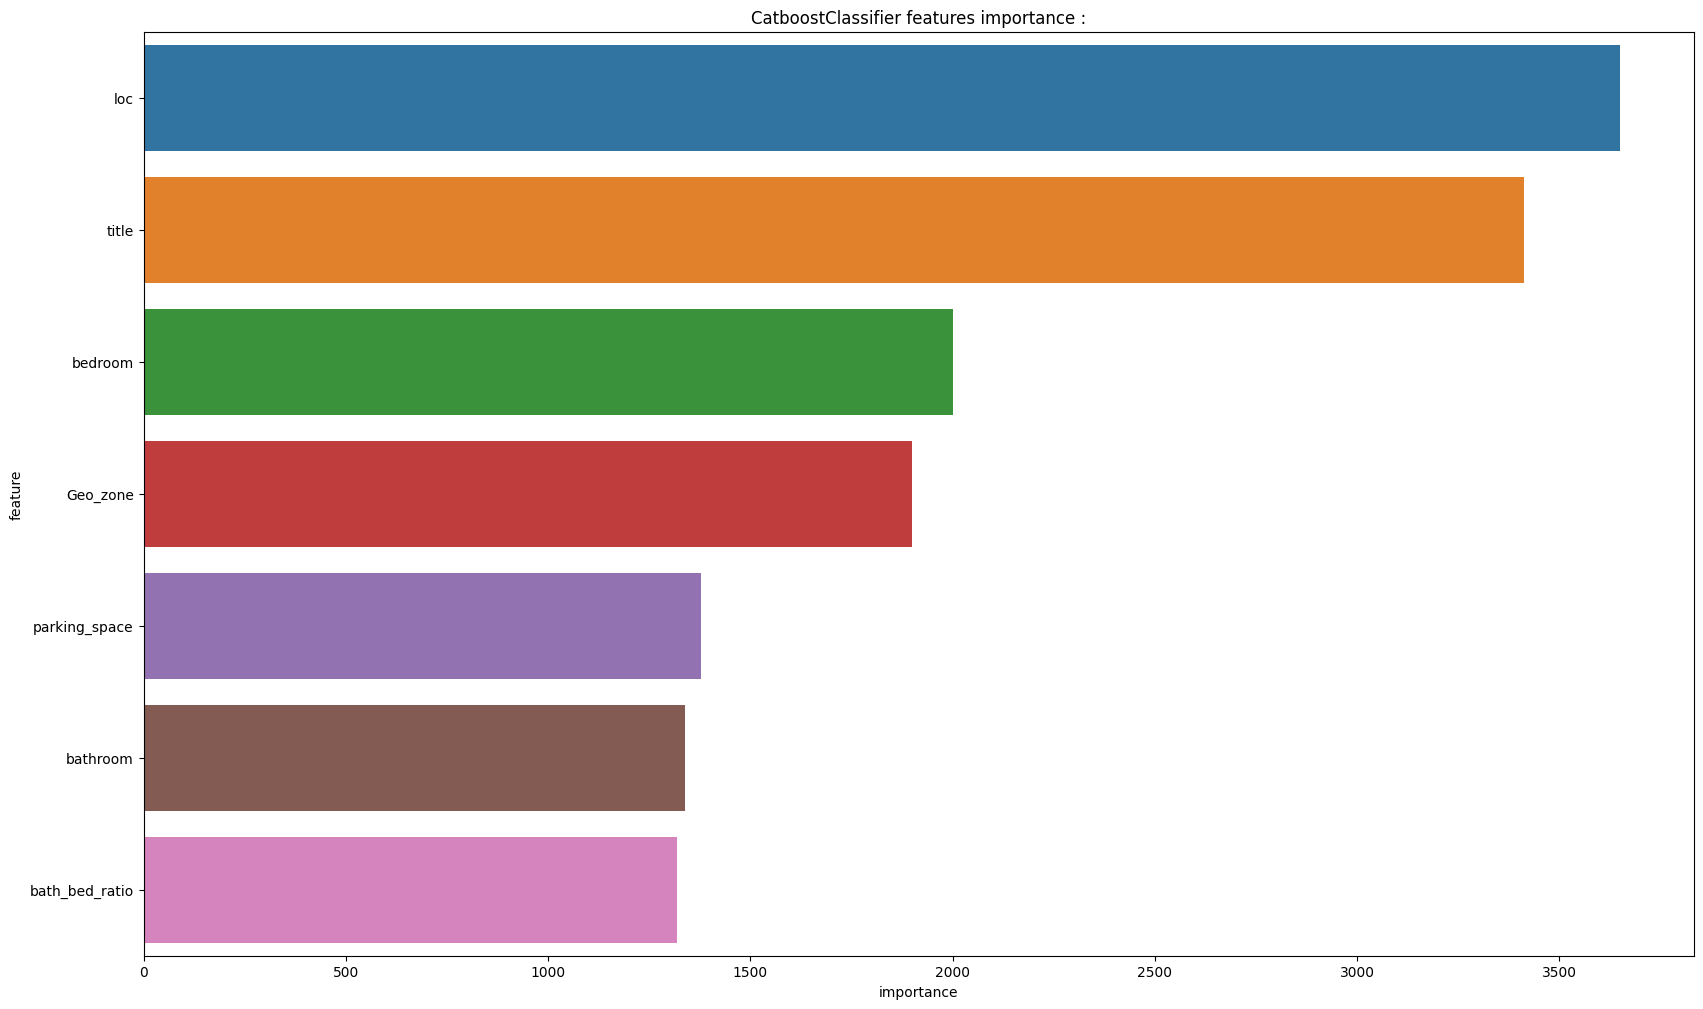

In [ ]:
# # 0.7831404345536787
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance :')